In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

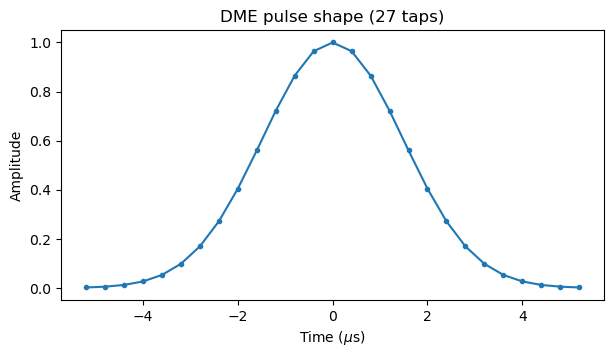

In [2]:
pulse_width = 3.5e-6
pulse_sigma = pulse_width / (2 * np.sqrt(2 * np.log(2)))
pulse_ntaps = 27
samp_rate = 2.5e6
taxis = (np.arange(pulse_ntaps) - pulse_ntaps//2) / samp_rate
pulse_taps_unnormalized = np.exp(-(np.arange(pulse_ntaps) - pulse_ntaps//2)**2 / (2 * (pulse_sigma * samp_rate)**2))
plt.plot(taxis * 1e6, pulse_taps_unnormalized, '.-')
plt.title('DME pulse shape (27 taps)')
plt.xlabel('Time ($\\mu$s)')
plt.ylabel('Amplitude');

In [3]:
pulse_taps_unnormalized[0]

np.float64(0.0021983125656917612)

In [4]:
npolyphase = 128
polyphase_pulse = np.exp(-(np.arange(pulse_ntaps * npolyphase) - pulse_ntaps * npolyphase // 2)**2
                         / (2 * (pulse_sigma * samp_rate * npolyphase)**2))
pulse_spacing = 12e-6
pulse_spacing_polysamples = round(pulse_spacing * samp_rate * npolyphase)
polyphase_double_pulse = (np.concatenate((polyphase_pulse, np.zeros(pulse_spacing_polysamples)))
                          + np.concatenate((np.zeros(pulse_spacing_polysamples), polyphase_pulse)))

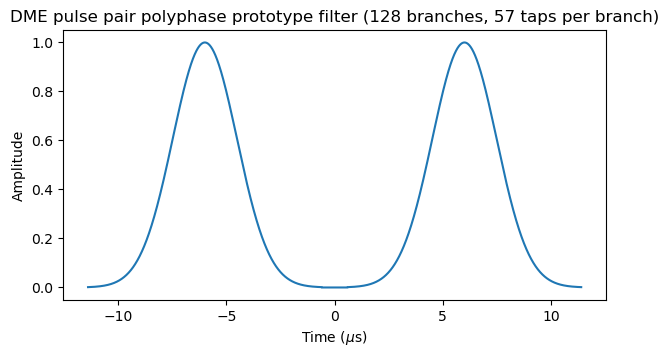

In [5]:
taxis_poly = np.arange(polyphase_double_pulse.size) / (samp_rate * npolyphase)
taxis_poly -= taxis_poly[taxis_poly.size//2]
plt.plot(taxis_poly * 1e6, polyphase_double_pulse)
plt.title(f'DME pulse pair polyphase prototype filter ({npolyphase} branches, {polyphase_double_pulse.size//npolyphase} taps per branch)')
plt.xlabel('Time ($\\mu$s)')
plt.ylabel('Amplitude');

In [6]:
1/(samp_rate * npolyphase)

3.125e-09